<a href="https://colab.research.google.com/github/Rach-fos/FINAL_PROJECT_NYPD-SHOOTINGS/blob/main/NYPD_Spatial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url1 = 'https://raw.githubusercontent.com/Rach-fos/FINAL_PROJECT_NYPD-SHOOTINGS/main/NYPD_Shooting_Incident_Data__Historic_%20(1).csv'

nypd_df = pd.read_csv(url1)

nypd_df


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,245029823,05/14/2022,03:02:00,BRONX,OUTSIDE,48,0.0,STREET,(null),False,...,(null),(null),18-24,M,BLACK,1.011526e+06,247828.000000,40.846864,-73.901413,POINT (-73.90141321 40.84686352)
27308,239583450,01/22/2022,13:15:00,MANHATTAN,OUTSIDE,30,0.0,STREET,(null),False,...,F,WHITE HISPANIC,25-44,M,WHITE HISPANIC,9.974580e+05,240485.000000,40.826743,-73.952273,POINT (-73.952273 40.826743)
27309,246825728,06/18/2022,03:29:00,MANHATTAN,OUTSIDE,32,0.0,STREET,(null),False,...,M,BLACK,25-44,M,BLACK,1.000999e+06,234464.000000,40.810209,-73.939496,POINT (-73.9394955 40.81020941)
27310,246876579,06/19/2022,20:08:00,BRONX,INSIDE,46,2.0,HOUSING,MULTI DWELL - PUBLIC HOUS,False,...,M,BLACK,25-44,M,WHITE HISPANIC,1.012980e+06,251028.000000,40.855644,-73.896141,POINT (-73.896141 40.855644)


In [4]:
shooting_incident_data = nypd_df.dropna() #description for dataframe
shooting_incident_data.info()
shooting_incident_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1706 entries, 25599 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             1706 non-null   int64  
 1   OCCUR_DATE               1706 non-null   object 
 2   OCCUR_TIME               1706 non-null   object 
 3   BORO                     1706 non-null   object 
 4   LOC_OF_OCCUR_DESC        1706 non-null   object 
 5   PRECINCT                 1706 non-null   int64  
 6   JURISDICTION_CODE        1706 non-null   float64
 7   LOC_CLASSFCTN_DESC       1706 non-null   object 
 8   LOCATION_DESC            1706 non-null   object 
 9   STATISTICAL_MURDER_FLAG  1706 non-null   bool   
 10  PERP_AGE_GROUP           1706 non-null   object 
 11  PERP_SEX                 1706 non-null   object 
 12  PERP_RACE                1706 non-null   object 
 13  VIC_AGE_GROUP            1706 non-null   object 
 14  VIC_SEX            

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
25599,243566884,04/12/2022,22:08:00,BRONX,OUTSIDE,49,0.0,STREET,(null),True,...,M,BLACK HISPANIC,18-24,F,BLACK,1020669.0,255027.0,40.866590,-73.868328,POINT (-73.86832754 40.86658962)
25600,256484816,12/17/2022,04:08:00,BRONX,OUTSIDE,52,0.0,STREET,(null),False,...,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,1008387.0,253290.0,40.861864,-73.912739,POINT (-73.91273918 40.86186421)
25601,250216145,08/27/2022,00:21:00,BRONX,OUTSIDE,44,0.0,VEHICLE,(null),False,...,(null),(null),25-44,M,WHITE HISPANIC,1008878.0,244480.0,40.837683,-73.910994,POINT (-73.910994 40.837683)
25602,239207164,01/15/2022,19:50:00,QUEENS,OUTSIDE,113,2.0,HOUSING,MULTI DWELL - PUBLIC HOUS,False,...,(null),(null),18-24,M,BLACK,1044794.0,188802.0,40.684689,-73.781699,POINT (-73.781699 40.684689)
25603,248013313,07/14/2022,01:19:00,BROOKLYN,INSIDE,77,0.0,DWELLING,MULTI DWELL - APT BUILD,False,...,(null),(null),25-44,F,BLACK,1002013.0,185752.0,40.676508,-73.935960,POINT (-73.93596 40.676508)


In [7]:
nypd_df['OCCUR_YEAR'] = pd.to_datetime(nypd_df['OCCUR_DATE']).dt.year
cluster_data = nypd_df[['BORO', 'OCCUR_YEAR']]

# Pivot the table for better visualization
cluster_data_pivot = cluster_data.pivot_table(index='OCCUR_YEAR', columns='BORO', aggfunc=len, fill_value=0)
cluster_data_pivot

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
OCCUR_YEAR,,,,,
2006,568,850,288,296,53
2007,533,833,233,238,50
2008,520,785,259,326,69
2009,529,770,196,278,55
2010,525,805,260,288,34
2011,571,839,215,264,50
2012,531,651,196,290,49
2013,371,593,138,185,52
2014,446,614,143,218,43


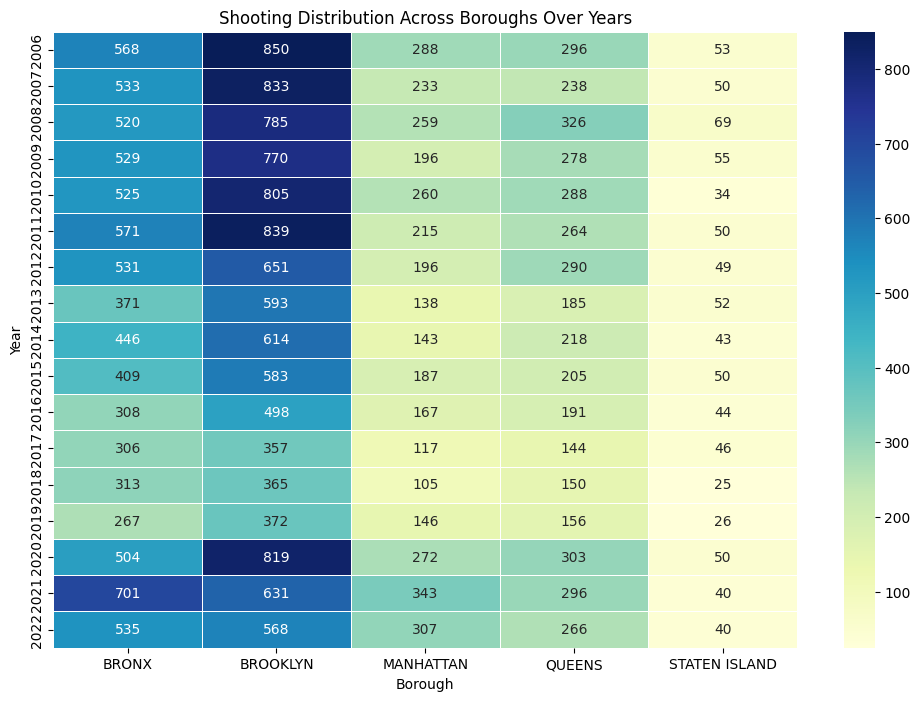

In [10]:
plt.figure(figsize=(12, 8))

# Draw the heatmap using seaborn
sns.heatmap(cluster_data_pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)

plt.title('Shooting Distribution Across Boroughs Over Years')
plt.xlabel('Borough')
plt.ylabel('Year')

plt.show()

In [38]:
import folium
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
from datetime import datetime, timedelta

NYC_lat = 40.730610
NYC_lon = -73.935242

map = folium.Map(location=[NYC_lat, NYC_lon], zoom_start=10)
# folium.TileLayer('cartodbpositron').add_to(map)

coords = [(x, y) for x, y in zip(shooting_incident_data['Latitude'], shooting_incident_data['Longitude'])]

for (x,y) in coords:
    folium.Circle(
        radius=1,
        location=[x, y],
        color="red",
    ).add_to(map)

map #cluster map

In [ ]:
url2 = 'https://raw.githubusercontent.com/Rach-fos/FINAL_PROJECT_NYPD-SHOOTINGS/main/StoryMap-data.csv'

census_df = pd.read_csv(url2)

census_df = census_df.drop([0, 1])
census_df

,Orig Order,GeoType,Borough,GeoID,Name,NTA Type,Total Population: Pop_10,Total Population: Pop_20,Total Population: Pop Change,Total Population: Natural Change,...,Black non-Hispanic: BNH_10,Black non-Hispanic: BNH_20,Black non-Hispanic: Pop Change,Black non-Hispanic: Natural Change,Black non-Hispanic: Net Migration,Asian non-Hispanic: ANH_10,Asian non-Hispanic: ANH_20,Asian non-Hispanic: Pop Change,Asian non-Hispanic: Natural Change,Asian non-Hispanic: Net Migration
2,1,NYC,New York City,0,NYC (adjusted for citywide total population in...,NaN,"8,242,624","8,804,190","561,566","612,638",...,"1,861,295","1,776,891","-84,404","87,308","-171,712","1,028,119","1,373,502","345,383","148,946","196,437"
3,2,Boro,Manhattan,1,Manhattan,NaN,"1,585,873","1,694,251","108,378","81,949",...,"205,340","199,592","-5,748","-1,153","-4,595","177,624","219,624","42,000","19,511","22,489"
4,3,Boro,Bronx,2,Bronx,NaN,"1,385,108","1,472,654","87,546","114,402",...,"416,695","419,393","2,698","29,364","-26,666","47,335","67,766","20,431","8,012","12,419"
5,4,Boro,Brooklyn,3,Brooklyn,NaN,"2,504,700","2,736,074","231,374","246,479",...,"799,066","729,696","-69,370","39,815","-109,185","260,129","370,776","110,647","49,274","61,373"
6,5,Boro,Queens,4,Queens,NaN,"2,230,722","2,405,464","174,742","152,976",...,"395,881","381,375","-14,506","15,628","-30,134","508,334","656,583","148,249","68,698","79,551"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,264,NTA2020,Staten Island,SI0391,Freshkills Park (South),9,97,95,-2,9,...,0,2,2,1,1,15,19,4,0,4
266,265,NTA2020,Staten Island,SI9561,Fort Wadsworth,6,731,495,-236,120,...,68,40,-28,6,-34,6,15,9,5,4
267,266,NTA2020,Staten Island,SI9591,Hoffman & Swinburne Islands,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,267,NTA2020,Staten Island,SI9592,Miller Field,9,31,46,15,-1,...,7,5,-2,-1,-1,0,7,7,0,7
